In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tickers=["XLC","XLY","XLP","XLE","XLF","XLV","XLI","XLB","XLK","XLU"]
start = datetime.datetime(2019, 9, 20)
end = datetime.datetime(2022, 9, 20)
df = yf.download(tickers, start=start, end=end)
prices=df['Adj Close'].pct_change().dropna()
prices.tail()

[*********************100%***********************]  10 of 10 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,
2022-09-13,-0.035660,-0.054910,-0.025219,-0.037240,-0.037659,-0.053085,-0.033392,-0.026626,-0.033036,-0.051561
2022-09-14,-0.012239,0.001703,0.028246,-0.002998,-0.001951,0.003636,-0.000418,0.008154,0.000551,0.012847
2022-09-15,-0.013189,-0.004345,-0.025769,0.003308,-0.010427,-0.023022,-0.008361,-0.024915,0.005586,-0.005124
2022-09-16,-0.015796,-0.010626,-0.021335,-0.008993,-0.020854,-0.005563,0.002389,-0.003746,-0.002817,-0.008039
2022-09-19,0.016554,0.005766,0.000593,0.011342,0.013572,0.008155,0.006646,0.013397,-0.005388,0.014149


In [3]:
stats_df = pd.DataFrame()
stats_df.index=prices.columns
stats_df['mean']= prices.mean()
stats_df['std'] = prices.std()
stats_df['skewness'] = prices.skew()
stats_df['kurtosis'] = prices.kurtosis()
stats_df['1st percent'] = prices.quantile(.01)
stats_df['10th percent'] = prices.quantile(.10)
stats_df['25th percent'] = prices.quantile(.25)
stats_df['50th percent'] = prices.quantile(.5)
stats_df['75th percent'] = prices.quantile(.75)
stats_df['90th percent'] = prices.quantile(.90)
stats_df['99th percent'] = prices.quantile(.99)
stats_df

,mean,std,skewness,kurtosis,1st percent,10th percent,25th percent,50th percent,75th percent,90th percent,99th percent
XLB,0.000539,0.017162,-0.375843,8.634431,-0.046367,-0.016781,-0.007589,0.000874,0.009334,0.018127,0.042931
XLC,0.000215,0.016633,-0.603378,6.289608,-0.044141,-0.018234,-0.007372,0.001115,0.008300,0.017813,0.042662
XLE,0.000924,0.027076,-0.443184,8.958290,-0.061846,-0.027904,-0.011789,0.000592,0.014736,0.030709,0.072260
XLF,0.000499,0.019534,-0.194007,11.222741,-0.051051,-0.019266,-0.008271,0.000678,0.010234,0.018831,0.053113
XLI,0.000405,0.017005,-0.299291,11.208370,-0.046887,-0.015789,-0.006690,0.001082,0.008000,0.016724,0.046479
XLK,0.000860,0.019224,-0.289527,7.905922,-0.047862,-0.020702,-0.008286,0.001455,0.010713,0.020092,0.043351
XLP,0.000404,0.012312,-0.202416,14.866758,-0.035517,-0.011032,-0.003858,0.000691,0.005603,0.010632,0.038083
XLU,0.000471,0.016286,0.232158,15.078791,-0.047996,-0.013694,-0.006515,0.001036,0.007500,0.013739,0.050594
XLV,0.000582,0.013482,-0.202544,9.821442,-0.037212,-0.012077,-0.005079,0.000892,0.006821,0.013298,0.045532
XLY,0.000571,0.017812,-0.772882,6.868442,-0.051945,-0.019113,-0.006363,0.001518,0.009540,0.018940,0.038935


In [4]:
u, s, vh = np.linalg.svd(prices)

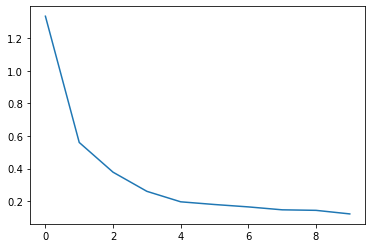

In [5]:
plt.plot(s)

In [6]:
port_1 = vh[0]/sum(vh[0])
port_2 = vh[1]/sum(vh[1])
port_3 = vh[2]/sum(vh[2])

port_df = pd.DataFrame([port_1,port_2,port_3])
port_df.columns = tickers

print(port_df)

        XLC       XLY       XLP       XLE       XLF       XLV       XLI  \
0  0.106457  0.091416  0.142431  0.121030  0.107402  0.109286  0.064890   
1 -0.038036  0.641185 -1.687051 -0.213637 -0.063872  0.802995  0.323053   
2  0.221557 -0.887002 -0.459862  0.207266  0.268328 -0.841617  0.945158   

        XLB       XLK       XLU  
0  0.079918  0.074794  0.102376  
1  0.291898  0.369645  0.573818  
2  1.906680  0.570321 -0.930829  


The first eigenportfolio is pretty fairly weighted in each ETF, which was the goal of choosing these ETFs. This appears to be explaining a good deal of the variance in the market. The second Portfolio is heavily short materials and energy while taking big positions everywhre else. So this portfolio is short commodities and long everything else besides communications services, which has some volatile growth stocks. This portfolio may be avoiding the most volatile sectors. The third portfolio is heavily short a few sectors and double long the materials sector.

In [7]:
port_returns = prices@port_df.T
port_returns.head()

,0,1,2
Date,,,
2019-09-23,0.000088,-0.008883,-0.005450
2019-09-24,-0.006516,-0.017798,-0.032079
2019-09-25,0.004368,0.007183,0.024194
2019-09-26,-0.002785,-0.009945,-0.007390
2019-09-27,-0.003606,-0.012750,-0.007454


In [8]:
annual_returns = port_returns.mean()*252
print(annual_returns)

0    0.136973
1    0.199466
2    0.164962
dtype: float64


In [9]:
annual_stds = port_returns.std()*np.sqrt(252)
print(annual_stds)

0    0.235520
1    0.380551
2    0.585273
dtype: float64


In [10]:
annual_sharpes = annual_returns/annual_stds
print(annual_sharpes)

0    0.581576
1    0.524151
2    0.281855
dtype: float64


<AxesSubplot:xlabel='Date'>

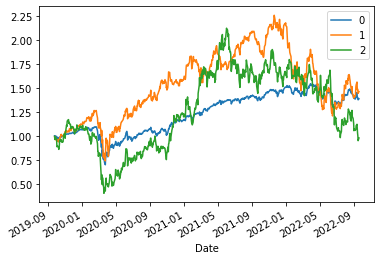

In [11]:
(port_returns+1).cumprod().plot()

In [12]:
pnl = (port_returns+1).cumprod()
pnl

,0,1,2
Date,,,
2019-09-23,1.000088,0.991117,0.994550
2019-09-24,0.993572,0.973477,0.962646
2019-09-25,0.997911,0.980469,0.985936
2019-09-26,0.995132,0.970718,0.978650
2019-09-27,0.991544,0.958342,0.971356
...,...,...,...
2022-09-13,1.395454,1.480318,1.067083
2022-09-14,1.401670,1.488159,1.027671
2022-09-15,1.387264,1.474379,1.000264


The annual returns do not resemble the order of the eigenvectors. The volatility of the portfolios goes up with the order as the portfolios get more concentrated and lose the benefits of diversification. Due to this the Sharpe Ratio for each portfolio goes down. So the order definitely seems to correlate to risk adjusted returns of the portfolios.